In [1]:
## imports
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
import random

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()
dc_crim_2020.shape
dc_crim_2020.info()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.047103,38.912616,21400024,2020/12/22 17:58:29+00,EVENING,OTHERS,THEFT/OTHER,2100 - 2118 BLOCK OF R STREET NW,395915.0,138306.0,...,005500 1,5500.0,Precinct 14,38.912608,-77.047101,NaN,2020/12/19 10:00:00+00,2020/12/19 11:00:00+00,586619715,21400024-01
1,-77.009095,38.873808,21400028,2020/12/18 21:04:23+00,EVENING,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF SOUTH CAPITOL STREET,399211.0,133997.0,...,006400 1,6400.0,Precinct 127,38.873801,-77.009092,NaN,2020/12/16 20:35:00+00,2020/12/18 20:35:00+00,586619716,21400028-01
2,-76.978922,38.843890,29098882,2020/07/08 22:13:24+00,EVENING,OTHERS,THEFT/OTHER,3500 - 3599 BLOCK OF STANTON ROAD SE,401830.0,130676.0,...,007409 3,7409.0,Precinct 116,38.843882,-76.978920,NaN,2020/06/29 14:06:50+00,2020/06/29 17:30:56+00,586619828,29098882-01
3,-77.024645,38.918794,29105847,2020/07/24 12:42:24+00,DAY,OTHERS,THEFT/OTHER,912 - 945 BLOCK OF FLORIDA AVENUE NW,397863.0,138991.0,...,003500 2,3500.0,Precinct 37,38.918786,-77.024642,NaN,2020/07/23 20:06:49+00,2020/07/24 07:00:55+00,586619829,29105847-01
4,-77.001513,38.925598,29153585,2020/10/26 22:26:55+00,EVENING,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF FRANKLIN STREET NE,399869.0,139746.0,...,009204 1,9204.0,Precinct 74,38.925590,-77.001511,NaN,2020/10/19 14:53:13+00,2020/10/19 19:00:18+00,586619831,29153585-01


(27875, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27875 entries, 0 to 27874
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     27875 non-null  float64
 1   Y                     27875 non-null  float64
 2   CCN                   27875 non-null  int64  
 3   REPORT_DAT            27875 non-null  object 
 4   SHIFT                 27875 non-null  object 
 5   METHOD                27875 non-null  object 
 6   OFFENSE               27875 non-null  object 
 7   BLOCK                 27875 non-null  object 
 8   XBLOCK                27875 non-null  float64
 9   YBLOCK                27875 non-null  float64
 10  WARD                  27875 non-null  int64  
 11  ANC                   27875 non-null  object 
 12  DISTRICT              27874 non-null  float64
 13  PSA                   27874 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  27865 non-null  object 
 15  BLOCK_GROUP        

# Example of creating a table to export to latex

In [11]:
method_v_offense = pd.crosstab(dc_crim_2020.METHOD, 
                              dc_crim_2020.OFFENSE)
method_v_offense

## method 1- transpose and print a table to console to copy/paste
print(method_v_offense.T.to_latex(index = False, caption = "Types of weapons in offenses",
                                 label = "tab:method_offense"))

## method 2- write .tex to folder and upload to overleaf/reference the tex file directly 
method_v_offense.T.to_latex("methodoffense.tex", 
                            index = False, caption = "Types of weapons in offenses",
                            label = "tab:method_offense_written")


## for method 2, if working with latex locally, can also then
## just reference the filepath directly rather than uploading to overleaf

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
METHOD,,,,,,,,,
GUN,0,842,6,170,3,982,8,0,1
KNIFE,0,481,0,9,0,123,10,0,0
OTHERS,13,300,1439,18,3255,890,155,8267,10902


\begin{table}
\centering
\caption{Types of weapons in offenses}
\label{tab:method_offense}
\begin{tabular}{rrr}
\toprule
 GUN &  KNIFE &  OTHERS \\
   0 &      0 &      13 \\
\midrule
 842 &    481 &     300 \\
   6 &      0 &    1439 \\
 170 &      9 &      18 \\
   3 &      0 &    3255 \\
 982 &    123 &     890 \\
   8 &     10 &     155 \\
   0 &      0 &    8267 \\
   1 &      0 &   10902 \\
\bottomrule
\end{tabular}
\end{table}



## Example of creating a figure to export 


,SHIFT,OCTO_RECORD_ID
0,DAY,10081
1,EVENING,12299
2,MIDNIGHT,5494


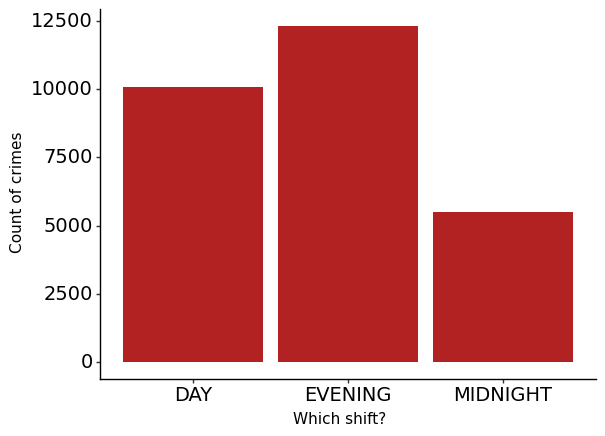

<ggplot: (8784118777052)>

In [12]:
## create a fig with the count of crimes by shift 

count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['OCTO_RECORD_ID'].nunique()).reset_index()
count_byshift

plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
                                       y = 'OCTO_RECORD_ID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts

## method 1- (would avoid)- can left click and save image

## method 2 - write image
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)

# Activity 

1. You decide the table is only informative for crimes where there's variation in the the type of method used. Filter and create a new table that only includes offenses where <80% of the methods == other.

2. Create a table to export to latex with that filtered information. Ideally programmatically rather than manually, create a caption that specifies which offenses are excluded from the table. In LaTeX, write a few bullet points summarizing what the figure shows. Have one bullet point define the fraction using mathematical notation

3. With that filtered set of offenses, create a figure where the x axis is the type of offense and the y axis is the proportion of that offense where a gun is used. Order the x axis from highest to lowest. Export for latex.

4. *Challenge exercise*: an analyst on a different team wants a breakdown of how the workload varies by shift. They want a separate figure for each of the ANCs in ward 8 (ANC starts with 8). Using a loop or function, write a separate bar plot for each ANC and make sure to programatically change the name of the plot filename so you know which is which. 

METHOD,OFFENSE,GUN,KNIFE,OTHERS,other_perc
0,ARSON,0,0,13,1.000000
1,ASSAULT W/DANGEROUS WEAPON,842,481,300,0.184843
2,BURGLARY,6,0,1439,0.995848
3,HOMICIDE,170,9,18,0.091371
4,MOTOR VEHICLE THEFT,3,0,3255,0.999079
5,ROBBERY,982,123,890,0.446115
6,SEX ABUSE,8,10,155,0.895954
7,THEFT F/AUTO,0,0,8267,1.000000
8,THEFT/OTHER,1,0,10902,0.999908


['ARSON',
 'BURGLARY',
 'MOTOR VEHICLE THEFT',
 'SEX ABUSE',
 'THEFT F/AUTO',
 'THEFT/OTHER']

'ARSON; BURGLARY; MOTOR VEHICLE THEFT; SEX ABUSE; THEFT F/AUTO; THEFT/OTHER'

'Types of weapons in offenses. This excludes the following offenses where >=80\\% of weapons were other: ARSON; BURGLARY; MOTOR VEHICLE THEFT; SEX ABUSE; THEFT F/AUTO; THEFT/OTHER'

\begin{table}
\centering
\caption{Types of weapons in offenses. This excludes the following offenses where >=80\% of weapons were other: ARSON; BURGLARY; MOTOR VEHICLE THEFT; SEX ABUSE; THEFT F/AUTO; THEFT/OTHER}
\label{tab:method_offense_filtered}
\begin{tabular}{lrrrr}
\toprule
                   OFFENSE &  GUN &  KNIFE &  OTHERS &  other\_perc \\
\midrule
ASSAULT W/DANGEROUS WEAPON &  842 &    481 &     300 &    0.184843 \\
                  HOMICIDE &  170 &      9 &      18 &    0.091371 \\
                   ROBBERY &  982 &    123 &     890 &    0.446115 \\
\bottomrule
\end{tabular}
\end{table}



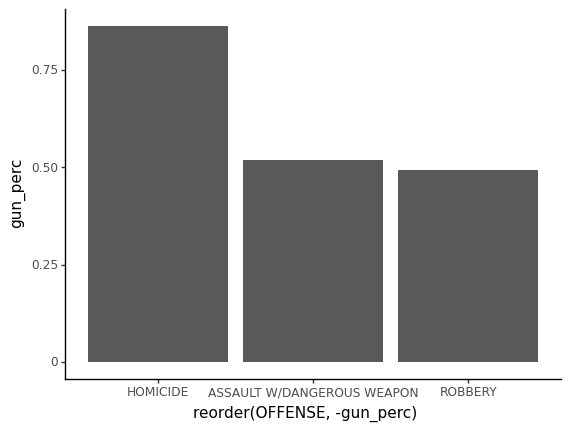

<ggplot: (8784119755716)>

ANC,1A,1B,1C,1D,2A,2B,2C,2D,2E,2F,...,7B,7C,7D,7E,7F,8A,8B,8C,8D,8E
is_ward_8,,,,,,,,,,,,,,,,,,,,,
False,1134,1514,560,327,431,1243,843,57,785,999,...,728,794,896,645,647,0,0,0,0,0
True,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,806,472,501,429,530


['8C', '8A', '8D', '8E', '8B']

[None, None, None, None, None]

In [13]:
## 1. Exclude all other

m_d = method_v_offense.T.reset_index()
m_d['other_perc'] = m_d['OTHERS']/m_d[['GUN', 'KNIFE', 'OTHERS']].sum(axis = 1)
m_d

m_d_filtered = m_d[m_d.other_perc < 0.8].copy()


## 2. 
### Create a string listing excluded offenses
excluded_offense = m_d.loc[~m_d.OFFENSE.isin(m_d_filtered.OFFENSE), 'OFFENSE'].to_list()
excluded_offense
excluded_offense_str = "; ".join(excluded_offense)

excluded_offense_str

### Print the table
descriptive_caption = "Types of weapons in offenses. This excludes the following offenses where >=80\% of weapons were other: " + \
                    excluded_offense_str
descriptive_caption

print(m_d_filtered.to_latex(index = False, caption = descriptive_caption,
                                 label = "tab:method_offense_filtered"))

## 3. 
### plot
m_d_filtered['gun_perc'] = m_d['GUN']/m_d[['GUN', 'KNIFE', 'OTHERS']].sum(axis = 1)
(ggplot(m_d_filtered, aes(x = 'reorder(OFFENSE, -gun_perc)', y = 'gun_perc')) +
geom_bar(stat = "identity") +
theme_classic())

## 4.
### filter broader data to ancs in ward 8
dc_crim_2020['is_ward_8'] = np.where(dc_crim_2020.ANC.str.startswith("8"), True, 
                                    False)

### sanity check
pd.crosstab(dc_crim_2020.is_ward_8,
           dc_crim_2020.ANC)

dc_w8 = dc_crim_2020[dc_crim_2020.is_ward_8].copy()

### function to subset to one ward
### and plot the result; test outside
def plot_oneANC(one_anc: str, 
                df_pullfrom: pd.DataFrame):

    ## pull out that anc
    dc_sub = dc_w8[dc_w8.ANC == one_anc].copy()
    
    ## calc count by shift
    count_byshift = pd.DataFrame(dc_sub.groupby('SHIFT')['OCTO_RECORD_ID'].nunique()).reset_index()
    
    ## plot by shift
    plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
                                       y = 'OCTO_RECORD_ID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
    
    ## save with anc name
    plot_shifts.save("plot_shifts_anc_{}.png".format(one_anc), 
                width = 12,
                height = 8,
                verbose = False)
    
    return None 



all_wards = list(dc_w8.ANC.unique())
all_wards


[plot_oneANC(one_ward, dc_w8) for one_ward in all_wards]
